***
## Linear Regression Algorithm (with Gradient Descent and MSE)
***
#### 1. Loss Function -> Mean Squared Error (MSE): 

$$J(m,b) = \frac{1}{n}\sum_{i=1}^{n}\left ( y_i - \hat{y_i} \right )^2$$ 

&emsp;&emsp; where $\hat{y_i} = \left ( mx_i + b \right )$

#### 2. Gradient Descent

Update Rules:

$$m = m - \alpha dm$$
$$b = b - \alpha db$$

where $\alpha$ is the learning rate.

&emsp; Gradient of $MSE$ wrt. $m$ and $b$:

$$\frac{\partial J}{\partial m} = \frac{2}{n}\sum_{i=1}^{n}-x_i\left ( y_i - \hat{y_i} \right )$$ 

$$\frac{\partial J}{\partial b} = \frac{2}{n}\sum_{i=1}^{n}-\left ( y_i - \hat{y_i} \right )$$ 
***

In [39]:
import numpy as np

class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000, verbose=False):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.verbose=verbose

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            cost = self._cost(y, y_predicted)
            
            if self.verbose:
                print(f"Iter {i} : cost {cost}, m {m}, b {b}")
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated
    
    def _cost(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

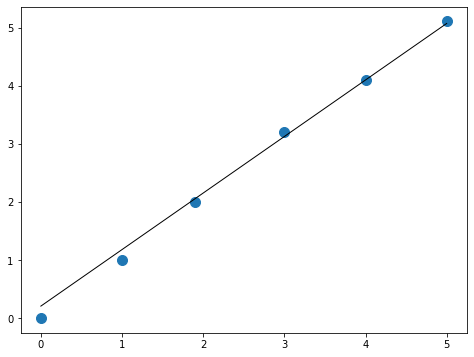

In [51]:
import numpy as np
import matplotlib.pyplot as plt

points = [[0,0], [1,1], [1.9,2], [3,3.2], [4,4.1], [5,5.11]]
X = np.array([[p[0]] for p in points])
y = np.array([p[1] for p in points])

regressor = LinearRegression(learning_rate=0.01, n_iters=100)
regressor.fit(X, y)

y_pred_line = regressor.predict(X)

fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X, y, s=100)
plt.plot(X, y_pred_line, color='black', linewidth=1, label="Prediction")
plt.show()

***
## Stochastic Gradient Descent with MSE
***
Use only one sample to update the parameters.
***

In [45]:
import numpy as np

class StochasticLinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000, sample_size=1, verbose=False):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.sample_size = sample_size
        self.verbose=verbose

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for i in range(self.n_iters):
            indexes = np.random.randint(0, n_samples, self.sample_size)
            Xs = np.take(X, indexes)
            ys = np.take(y, indexes)
            
            y_predicted = np.dot(X, self.weights) + self.bias
            y_predicteds = np.dot(Xs, self.weights) + self.bias
            # compute gradients
            dw = (1 / self.sample_size) * np.dot(Xs.T, (y_predicteds - ys))
            db = (1 / self.sample_size) * np.sum(y_predicteds - ys)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            
            cost = self._cost(y, y_predicted)
            
            if self.verbose:
                print(f"Iter {i} : cost {cost}, m {m}, b {b}")
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated
    
    def _cost(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

In [49]:
regressor = StochasticLinearRegression(learning_rate=0.01, n_iters=10, verbose=True)
regressor.fit(X, y)

Iter 0 : cost 9.693683333333333, m 0.7698750581675177, b 0.273916087142606
Iter 1 : cost 5.29367333375, m 0.7698750581675177, b 0.273916087142606
Iter 2 : cost 5.295597756854333, m 0.7698750581675177, b 0.273916087142606
Iter 3 : cost 5.297503450162105, m 0.7698750581675177, b 0.273916087142606
Iter 4 : cost 2.8918108078043043, m 0.7698750581675177, b 0.273916087142606
Iter 5 : cost 2.8313420392132485, m 0.7698750581675177, b 0.273916087142606
Iter 6 : cost 1.5449803240359916, m 0.7698750581675177, b 0.273916087142606
Iter 7 : cost 1.2403552775004278, m 0.7698750581675177, b 0.273916087142606
Iter 8 : cost 1.2202153517628413, m 0.7698750581675177, b 0.273916087142606
Iter 9 : cost 1.1262385593026665, m 0.7698750581675177, b 0.273916087142606


## References
- [Gradient Descent From Scratch](https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc)
- [Machine Learning Tutorial Python - 4: Gradient Descent and Cost Function](https://www.youtube.com/watch?v=vsWrXfO3wWw&ab_channel=codebasics)
- [Linear Regression in Python - Machine Learning From Scratch 02 - Python Tutorial](https://youtu.be/4swNt7PiamQ?list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E)
- [MLfromscratch](https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/linear_regression.py)